# Neural Networks - The components

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 06/01/2025   | Martin | Create   | Created notebook for chapter 6 | 
| 07/01/2025   | Martin | Create   | Completed implementing operational gates and tested various activation functions | 

# Content

* [Introduction](#introduction)
* [Implementing Operational Gates](#implementing-operational-gates)
* [Gates and activation functions](#gates-and-activation-functions)
* [Implementing one-layer NN](#implementing-one-layer-neural-network)

# Introduction

__Neural Network__ - a sequence of operations applied to a matrix of input data. Collection of additions and multiplications followed by a non-linear function

__Key terms__
* _Backpropogation_ - Updating the model based on the learning rate and the output of the loss function. Done through a sequence of derivatives to determine the changes applied to the weight on each node in the network
* _Activation function_ - Function that applies non-linearity to the model
* _Hyperparameters_ - Values that define the model and are selected before training begins. Tuning this improves model performance

# Implementing Operational Gates

_Operational gates "=" Each node acts as a matheamtical operation that is applied to the data fed to it_

e.g

$$
f(x) = a \cdot x
$$

* $a$: variable weights
* $x$: input data

This process will return a result and the result is fed into the next operational gate

$$
f_2(x) = f(x) + b
$$

* $b$: the bias term (another variable)

The output of this function will be the predicted value of the model. The loss function i.e the difference between the output and the target value is computed and used to score the model and implement backprop.

Emphasis on the output rather than intermediate values

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

Implement a single node to "learn" and update itself to the desired weights

* Target weight: 50
* Data fed: 5
* Optimiser: SGD
* Loss function: MSE

In [8]:
# Initialise weights and input data
a = tf.Variable(4.)
x_data = tf.keras.Input(shape=(1,))
x_val = tf.constant([[5.]], dtype=tf.float32)

# Configure the node
multiply_layer = tf.keras.layers.Lambda(lambda x: tf.multiply(a, x))
outputs = multiply_layer(x_data)

# Define the model
model = tf.keras.Model(inputs=x_data, outputs=outputs, name='node_1')

print(model.summary())

Model: "node_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


First a model with a only the weights trained

In [9]:
# Implement the training loop
optimiser = tf.keras.optimizers.SGD(0.01)

print("Optimising a multiplication gate output to 50")
for i in range(10):
  # define the gradient tape
  with tf.GradientTape() as tape:
    # get the output - forward pass
    model_output = model(x_val)

    # get the loss
    loss = tf.square(tf.subtract(model_output, 50.))

  # get the gradients to update weights
  gradients = tape.gradient(loss, a)

  # apply changes to the weights
  optimiser.apply_gradients(zip([gradients], [a]))

  print(f"Step: {i}: => {a.numpy()} * {x_val} = {a.numpy()*x_val}")
    

Optimising a multiplication gate output to 50
Step: 0: => 7.0 * [[5.]] = [[35.]]
Step: 1: => 8.5 * [[5.]] = [[42.5]]
Step: 2: => 9.25 * [[5.]] = [[46.25]]
Step: 3: => 9.625 * [[5.]] = [[48.125]]
Step: 4: => 9.8125 * [[5.]] = [[49.0625]]
Step: 5: => 9.90625 * [[5.]] = [[49.53125]]
Step: 6: => 9.953125 * [[5.]] = [[49.765625]]
Step: 7: => 9.9765625 * [[5.]] = [[49.882812]]
Step: 8: => 9.98828125 * [[5.]] = [[49.941406]]
Step: 9: => 9.994140625 * [[5.]] = [[49.970703]]


Next a model with the bias term included

In [10]:
# Initialise weights and input data
a = tf.Variable(4., dtype=tf.float32)
b = tf.Variable(1., dtype=tf.float32)
x_data = tf.keras.Input(shape=(1,))
x_val = tf.constant([[5.]], dtype=tf.float32)

# Configure the node
multiply_layer = tf.keras.layers.Lambda(lambda x: tf.multiply(a, x))
add_layer = tf.keras.layers.Lambda(lambda x: tf.add(b, x))
intermediate = multiply_layer(x_data)
outputs = add_layer(intermediate)

# Define the model
model = tf.keras.Model(inputs=x_data, outputs=outputs, name='node_2')

print(model.summary())

Model: "node_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_3 (Lambda)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_4 (Lambda)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [12]:
# Implement the training loop
optimiser = tf.keras.optimizers.SGD(0.01)

print("Optimising a multiplication gate output to 50")
for i in range(10):
  # define the gradient tape
  with tf.GradientTape(persistent=True) as tape:
    # get the output - forward pass
    model_output = model(x_val)

    # get the loss
    loss = tf.square(tf.subtract(model_output, 50.))

  # get the gradients to update weights
  gradients_a = tape.gradient(loss, a)
  gradients_b = tape.gradient(loss, b)

  # apply changes to the weights
  optimiser.apply_gradients(zip([gradients_a, gradients_b], [a, b]))

  print(f"Step: {i}: => {a.numpy()} * {x_val} + {b.numpy()} = {a.numpy()*x_val+b.numpy()}")

Optimising a multiplication gate output to 50
Step: 0: => 6.899999618530273 * [[5.]] + 1.5799999237060547 = [[36.08]]
Step: 1: => 8.291999816894531 * [[5.]] + 1.8583998680114746 = [[43.318398]]
Step: 2: => 8.960160255432129 * [[5.]] + 1.9920319318771362 = [[46.79283]]
Step: 3: => 9.280877113342285 * [[5.]] + 2.0561752319335938 = [[48.46056]]
Step: 4: => 9.434821128845215 * [[5.]] + 2.0869641304016113 = [[49.26107]]
Step: 5: => 9.508713722229004 * [[5.]] + 2.101742744445801 = [[49.64531]]
Step: 6: => 9.544182777404785 * [[5.]] + 2.1088366508483887 = [[49.82975]]
Step: 7: => 9.56120777130127 * [[5.]] + 2.112241744995117 = [[49.91828]]
Step: 8: => 9.569379806518555 * [[5.]] + 2.1138761043548584 = [[49.960777]]
Step: 9: => 9.573302268981934 * [[5.]] + 2.1146605014801025 = [[49.981174]]


📜 __NOTE: Good resource on describing how `GradientTape` works: [here](https://www.geeksforgeeks.org/tf-gradienttape-in-tensorflow/)__

## Interpreting results

* Tensorflow keeps track of the model operations and variables, making changes to them based on the optimisation algorithm (SGD in the exmaple)
* Variables that are listed as `trainable` will be tracked by TF `GradientTape` and only these values will change - not the data
* All changes are done and optimised by TF

---

# Gates and activation functions

Introduce activation functions that bring in non-linearity to the model

* Sigmoid: $sigmoid(x)=\sigma(x)=\frac{1}{1+e^x}$
* Rectified linear unit (ReLU): $max(0, x)$

Same 1 layer NN using both activation functions and compare. Config:

* Target value: 0.75
* Loss: L2 distance (MSE)
* Optimiser: SGD

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)
np.random.seed(42)

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [3]:
# Initialise variables
batch_size = 50

# define parameters
x = np.random.normal(2, 0.1, 500)
x_data = tf.keras.Input(shape=(1,))

a1 = tf.Variable(tf.random.normal(shape=[1,1], seed=5))
b1 = tf.Variable(tf.random.uniform(shape=[1,1], seed=5))
a2 = tf.Variable(tf.random.normal(shape=[1,1], seed=5))
b2 = tf.Variable(tf.random.uniform(shape=[1,1], seed=5))

W0000 00:00:1736234898.625441    1663 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# Use the subclassing API
class MyCustomGateSigmoid(tf.keras.layers.Layer):
  def __init__(self, units, a1, b1):
    super(MyCustomGateSigmoid, self).__init__()
    self.units = units
    self.a1 = a1
    self.b1 = b1
  
  def call(self, inputs):
    return tf.math.sigmoid(inputs * self.a1 + self.b1)

# Define the custom layer
my_custom_gate_sigmoid = MyCustomGateSigmoid(units=1, a1=a1, b1=b1)
output_sigmoid = my_custom_gate_sigmoid(x_data)

# Build the model
model_sigmoid = tf.keras.Model(inputs=x_data, outputs=output_sigmoid, name='node_sigmoid')

In [5]:
# Use the subclassing API
class MyCustomGateRelu(tf.keras.layers.Layer):
  def __init__(self, units, a2, b2):
    super(MyCustomGateRelu, self).__init__()
    self.units = units
    self.a2 = a2
    self.b2 = b2
  
  def call(self, inputs):
    return tf.nn.relu(inputs * self.a2 + self.b2)

# Define the custom layer
my_custom_gate_relu = MyCustomGateRelu(units=1, a2=a2, b2=b2)
output_relu = my_custom_gate_relu(x_data)

# Build the model
model_relu = tf.keras.Model(inputs=x_data, outputs=output_relu, name='node_relu')

In [6]:
# Define the training loop
optimiser_sigmoid = tf.keras.optimizers.SGD(0.01)
optimiser_relu = tf.keras.optimizers.SGD(0.01)


# Run loop across gates
print("Optimising Sigmoid and Relu outputs to 0.75\n")

loss_vec_sigmoid = []
loss_vec_relu = []

activation_sigmoid = []
activation_relu = []

for i in range(500):

  # Randomly select data to be used for training
  rand_indices = np.random.choice(len(x), size=batch_size)
  x_vals = np.transpose([x[rand_indices]])

  with tf.GradientTape(persistent=True) as tape:

    # Forward pass
    sigmoid_output = model_sigmoid(x_vals)
    relu_output = model_relu(x_vals)

    # Get loss
    loss_sigmoid = tf.reduce_mean(tf.square(tf.subtract(sigmoid_output, 0.75)))
    loss_vec_sigmoid.append(loss_sigmoid)
    loss_relu = tf.reduce_mean(tf.square(tf.subtract(relu_output, 0.75)))
    loss_vec_relu.append(loss_relu)

  # gradient computation
  gradients_a1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.a1)
  gradients_b1 = tape.gradient(loss_sigmoid, my_custom_gate_sigmoid.b1)
  
  gradients_a2 = tape.gradient(loss_relu, my_custom_gate_relu.a2)
  gradients_b2 = tape.gradient(loss_relu, my_custom_gate_relu.b2)

  # Applying changes to weights
  optimiser_sigmoid.apply_gradients(zip([gradients_a1, gradients_b1], [my_custom_gate_sigmoid.a1, my_custom_gate_sigmoid.b1]))
  optimiser_relu.apply_gradients(zip([gradients_a2, gradients_b2], [my_custom_gate_relu.a2, my_custom_gate_relu.b2]))

  output_sigmoid = model_sigmoid(x_vals)
  output_relu = model_relu(x_vals)

  activation_sigmoid.append(np.mean(output_sigmoid))
  activation_relu.append(np.mean(output_relu))

  if i % 50 == 0:
    print(f"Sigmoid = {str(np.mean(output_sigmoid))} | Relu = {str(np.mean(output_relu))}")

Optimising Sigmoid and Relu outputs to 0.75

Sigmoid = 0.053502932 | Relu = 0.41717994
Sigmoid = 0.06592579 | Relu = 0.74954367
Sigmoid = 0.07885075 | Relu = 0.7502562
Sigmoid = 0.10079076 | Relu = 0.75001615
Sigmoid = 0.1306659 | Relu = 0.74857485
Sigmoid = 0.18301636 | Relu = 0.7482997
Sigmoid = 0.2614831 | Relu = 0.7496901
Sigmoid = 0.36430547 | Relu = 0.75106066
Sigmoid = 0.46104255 | Relu = 0.74935675
Sigmoid = 0.5375254 | Relu = 0.7483227


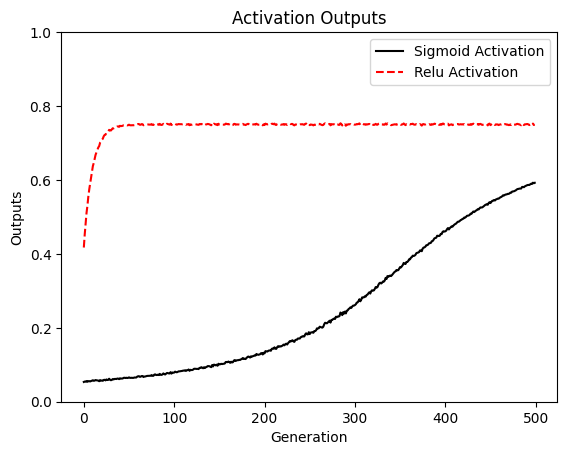

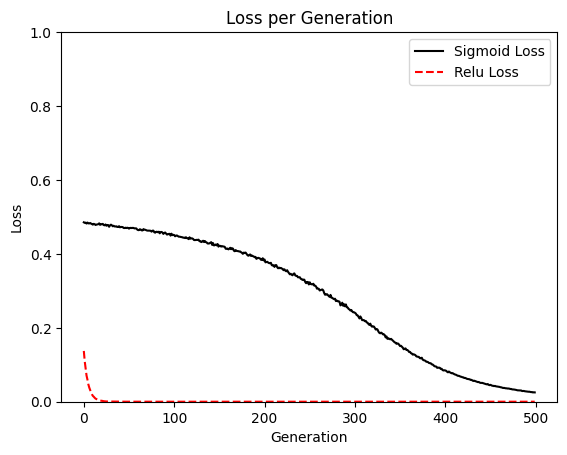

In [7]:
# Plotting the loss and activation outputs
plt.plot(activation_sigmoid, 'k-', label='Sigmoid Activation')
plt.plot(activation_relu, 'r--', label='Relu Activation')
plt.ylim([0, 1.0])
plt.title('Activation Outputs')
plt.xlabel('Generation')
plt.ylabel('Outputs')
plt.legend(loc='upper right')
plt.show()

plt.plot(loss_vec_sigmoid, 'k-', label='Sigmoid Loss') 
plt.plot(loss_vec_relu, 'r--', label='Relu Loss') 
plt.ylim([0, 1.0]) 
plt.title('Loss per Generation') 
plt.xlabel('Generation') 
plt.ylabel('Loss') 
plt.legend(loc='upper right') 
plt.show() 

## Interpreting results

* Both show convergence, but Relu achieves it much faster than sigmoid
* Relu returns 0 outputs more often which introduces _sparsity_, allowing for convergence to happen faster, but loss of controlled gradients (potentially vanishing gradient problem on larger networks)
* Sigmoid has well-controlled gradients and prevents extreme values (too low or too high) at the expense of slower convergence because updates are not as drastic

__Other alternatives__

* Smoother (like sigmoid): arctan, hypertangent, heaveside step
* Faster (like Relu): softplus, leaky ReLU, ELU

---

# Implementing one-layer neural network

Implementing on the iris dataset

__🚨 NN's are based on matrix multiplicatoin, so the dimensions of data and matrix must align__

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["GRPC_VERBOSITY"] = "ERROR"
os.environ["GLOG_minloglevel"] = "2"

In [ ]:
# pg 247